### Evaluation of Climate Classifier over full, 0.95 and 0.99 datasets:

### FULL

In [27]:
import pandas as pd
from sklearn.metrics import classification_report

# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"
full_path = f"{BASE_PATH}/manual_labels_fullsample_full.json"
abel_path = f"{BASE_PATH}/manual_labels_fullsample_abel.json"
tobias_path = f"{BASE_PATH}/manual_labels_fullsample_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to align labels
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize for comparison
df_abel["annotation"] = df_abel["annotation"].str.lower()
df_abel["label"] = df_abel["label"].str.lower()
df_tobias["annotation"] = df_tobias["annotation"].str.lower()
df_tobias["label"] = df_tobias["label"].str.lower()

# Filter to valid yes/no


# Compare each
print("Evaluation: Abel vs Model")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


Evaluation: Abel vs Model
              precision    recall  f1-score   support

          no      1.000     0.573     0.729        89
         yes      0.224     1.000     0.367        11

    accuracy                          0.620       100
   macro avg      0.612     0.787     0.548       100
weighted avg      0.915     0.620     0.689       100


Evaluation: Tobias vs Model
              precision    recall  f1-score   support

          no      0.980     0.585     0.733        82
         yes      0.333     0.944     0.493        18

    accuracy                          0.650       100
   macro avg      0.656     0.765     0.613       100
weighted avg      0.863     0.650     0.690       100



In [17]:
len(df_tobias)

99

In [19]:
bad_rows = df_tobias[~df_tobias["annotation"].isin(["yes", "no"])]
print(bad_rows)

Empty DataFrame
Columns: [repo, seq, text, timestamp, cid, uri, annotation, label]
Index: []


### 0.95 Dataset

In [26]:
import pandas as pd
from sklearn.metrics import classification_report

# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"
full_path = f"{BASE_PATH}/manual_labels_score95_full.json"
abel_path = f"{BASE_PATH}/manual_labels_score95_abel.json"
tobias_path = f"{BASE_PATH}/manual_labels_score95_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to get model label into each DataFrame
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize and filter to valid labels
for df in [df_abel, df_tobias]:
    df["annotation"] = df["annotation"].str.lower()
    df["label"] = df["label"].str.lower()
    df.dropna(subset=["annotation", "label"], inplace=True)
    df = df[df["annotation"].isin(["yes", "no"]) & df["label"].isin(["yes", "no"])]

# Evaluation
print("Evaluation: Abel vs Model (score95)")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model (score95)")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


Evaluation: Abel vs Model (score95)
              precision    recall  f1-score   support

          no      1.000     0.811     0.896        37
         yes      0.650     1.000     0.788        13

    accuracy                          0.860        50
   macro avg      0.825     0.905     0.842        50
weighted avg      0.909     0.860     0.868        50


Evaluation: Tobias vs Model (score95)
              precision    recall  f1-score   support

          no      0.950     0.594     0.731        32
         yes      0.567     0.944     0.708        18

    accuracy                          0.720        50
   macro avg      0.758     0.769     0.720        50
weighted avg      0.812     0.720     0.723        50



In [25]:
import pandas as pd
from sklearn.metrics import classification_report

# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"
full_path = f"{BASE_PATH}/manual_labels_score99_full.json"
abel_path = f"{BASE_PATH}/manual_labels_score99_abel.json"
tobias_path = f"{BASE_PATH}/manual_labels_score99_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to get model label into each DataFrame
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize and filter to valid labels
for df in [df_abel, df_tobias]:
    df["annotation"] = df["annotation"].str.lower()
    df["label"] = df["label"].str.lower()
    df.dropna(subset=["annotation", "label"], inplace=True)
    df = df[df["annotation"].isin(["yes", "no"]) & df["label"].isin(["yes", "no"])]

# Evaluation
print("Evaluation: Abel vs Model (score99)")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model (score99)")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


Evaluation: Abel vs Model (score99)
              precision    recall  f1-score   support

          no      1.000     0.909     0.952        33
         yes      0.850     1.000     0.919        17

    accuracy                          0.940        50
   macro avg      0.925     0.955     0.936        50
weighted avg      0.949     0.940     0.941        50


Evaluation: Tobias vs Model (score99)
              precision    recall  f1-score   support

          no      1.000     0.800     0.889        25
         yes      0.833     1.000     0.909        25

    accuracy                          0.900        50
   macro avg      0.917     0.900     0.899        50
weighted avg      0.917     0.900     0.899        50



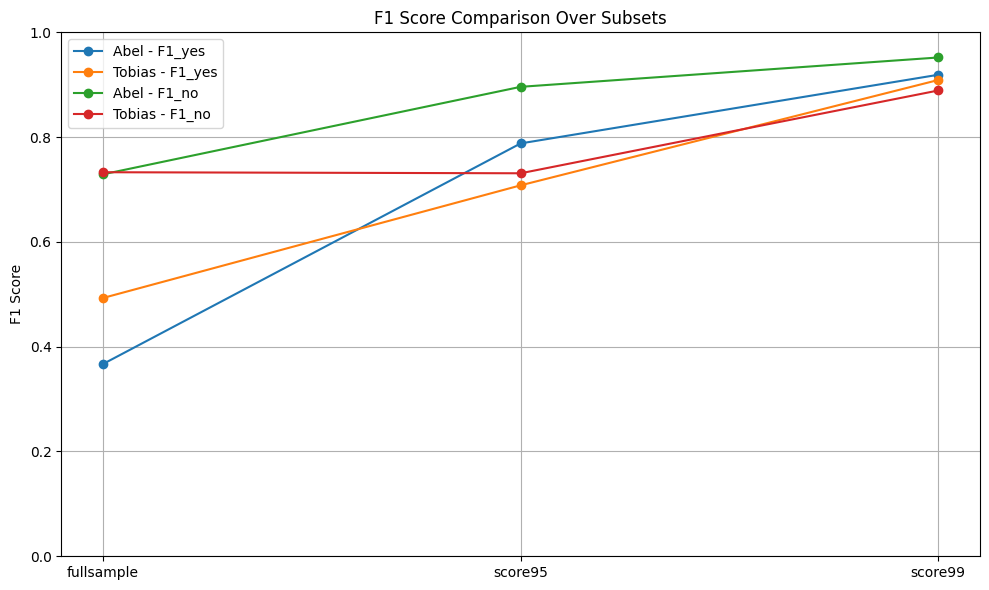

In [34]:
# Updated scores from user input
data = [
    {"Annotator": "Abel", "Subset": "fullsample", "F1_yes": 0.367, "F1_no": 0.729, "Accuracy": 0.620},
    {"Annotator": "Tobias", "Subset": "fullsample", "F1_yes": 0.493, "F1_no": 0.733, "Accuracy": 0.650},
    {"Annotator": "Abel", "Subset": "score95", "F1_yes": 0.788, "F1_no": 0.896, "Accuracy": 0.860},
    {"Annotator": "Tobias", "Subset": "score95", "F1_yes": 0.708, "F1_no": 0.731, "Accuracy": 0.720},
    {"Annotator": "Abel", "Subset": "score99", "F1_yes": 0.919, "F1_no": 0.952, "Accuracy": 0.940},
    {"Annotator": "Tobias", "Subset": "score99", "F1_yes": 0.909, "F1_no": 0.889, "Accuracy": 0.900},
]

df = pd.DataFrame(data)

# Plot F1 scores
fig, ax = plt.subplots(figsize=(10, 6))

for label in ["F1_yes", "F1_no"]:
    for annotator in df["Annotator"].unique():
        subset_data = df[df["Annotator"] == annotator]
        ax.plot(subset_data["Subset"], subset_data[label], marker='o', label=f"{annotator} - {label}")

ax.set_title("F1 Score Comparison Over Subsets")
ax.set_ylabel("F1 Score")
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Tobias - full   | F1 (yes): 0.493 | F1 (no): 0.733 | Acc: 0.650
